### Can we use remote sensing datasets to investigate the impact of wind extremes on carbon cycling in forests?
[Wind speeds from ERA5](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5)

[Vegetation Optical Depth (VOD) from SMOS](https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/smos)

Past studies have shown that disturbances such as fire can have a significant impact on carbon cycling, yet the impact of wind extremes on carbon cycling is largely unknown.  Using Hurricanes Irma and Maria (September - October 2017) as a case study, I will see if it is possible to observe a change in aboveground biomass before and after the storm through vegetation optical depth, a measure of canopy density from microwave remote sensing.  I will compare changes in aboveground biomass to maximum wind speeds during the hurricane to investigate the relationship between wind speeds and biomass loss.  

In [228]:
import xarray as xr
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import cartopy 
import cartopy.crs as ccrs

import os

### Load Vegetation Optical Depth (VOD) from SMOS  August 30 - September 2, 2017. 
Merge by date and subset by location

In [229]:
os.chdir('/Users/jashvina/jashvina/GoogleDrive/My Drive/2019_wind_extremes/Data')

In [230]:
os.getcwd()

'/Users/jashvina/jashvina/GoogleDrive/My Drive/2019_wind_extremes/Data'

**Define area of interest**

In [231]:
lonmin = -85
lonmax = -65
latmin = 17
latmax = 30

In [232]:
aug30 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20170830T000000_20170830T235959_105_002_8.DBL.nc')
aug31 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20170831T000000_20170831T235959_105_002_8.DBL.nc')
sep01 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20170901T000000_20170901T235959_105_002_8.DBL.nc')
sep02 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20170902T000000_20170902T235959_105_002_8.DBL.nc')


<font color=blue>**Get the mean for each pixel**</font>


In [233]:
sep = aug31.combine_first(sep01)
sep = sep.combine_first(sep02)
sep = sep.combine_first(aug30)

In [234]:
(np.min(sep.Optical_Thickness_Nad), np.max(sep.Optical_Thickness_Nad))

(<xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(-1.13451898), <xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(2.00978351))

### Load VOD from SMOS October 15 - 18, 2017.  
Merge by date and subset by location.

In [236]:
oct15 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20171015T000000_20171015T235959_105_001_8.DBL.nc')
oct16 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20171016T000000_20171016T235959_105_001_8.DBL.nc')
oct17 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20171017T000000_20171017T235959_105_001_8.DBL.nc')
oct18 = xr.open_dataset('2017_SMOS_asc/SM_RE06_MIR_CDF3SA_20171018T000000_20171018T235959_105_001_8.DBL.nc')

In [237]:
oc = oct18.combine_first(oct17)
oc = oc.combine_first(oct16)
oc = oc.combine_first(oct15)

In [238]:
(np.min(oc.Optical_Thickness_Nad), np.max(oc.Optical_Thickness_Nad))


(<xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(-1.4416337), <xarray.DataArray 'Optical_Thickness_Nad' ()>
 array(2.15230656))

Text(0.5, 1.0, 'Vegetation Optical Depth\n October 15-18, 2017')

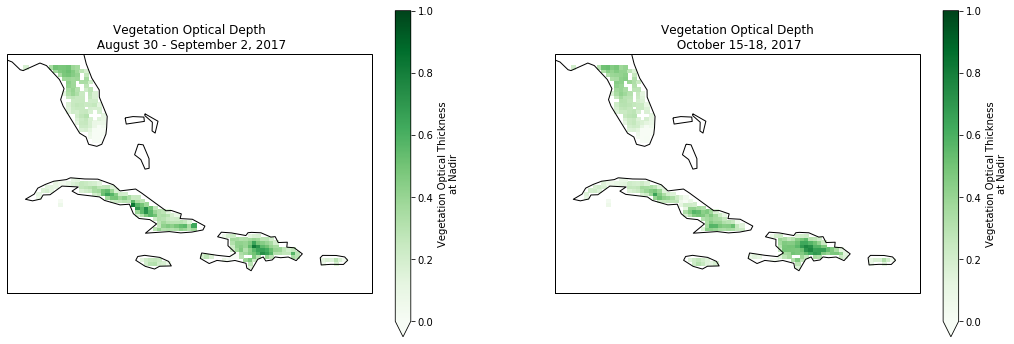

In [290]:
fig, axes = plt.subplots(figsize = (18, 6), ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].coastlines()
axes[1].coastlines()

sepsub = sep.sel(lat = slice(latmin, latmax), lon = slice(lonmin, lonmax))
sepsub.Optical_Thickness_Nad.plot(cmap = 'Greens', vmin = 0, vmax = 1, ax = axes[0])
axes[0].set_title('Vegetation Optical Depth\n August 30 - September 2, 2017')

octsub = oc.sel(lat = slice(latmin, latmax), lon = slice(lonmin, lonmax))
octsub.Optical_Thickness_Nad.plot(vmin = 0, vmax = 1, cmap = 'Greens', ax = axes[1])
axes[1].set_title('Vegetation Optical Depth\n October 15-18, 2017')

### Calculate the difference in VOD between the time points


<font color=blue>**Add new label for legend (low values = vegetation loss)**</font>


**Calculate percent change**

Text(0.5, 1.0, 'Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')

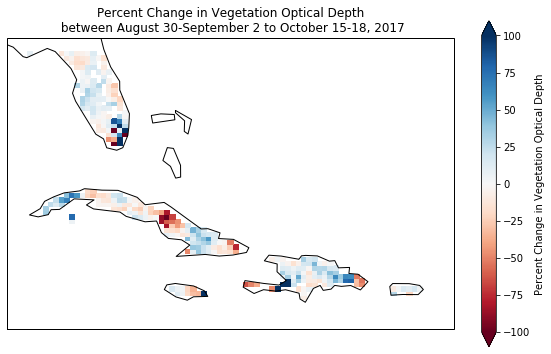

In [280]:
pc = ((octsub.Optical_Thickness_Nad - sepsub.Optical_Thickness_Nad) / np.abs(sepsub.Optical_Thickness_Nad)) * 100


fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
pcplt = pc.plot(cmap = 'RdBu', vmin = -100, vmax = 100, 
                cbar_kwargs={"label": "Percent Change in Vegetation Optical Depth"})
ax.set_title('Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


**Normalize the difference by the standard deviation, to get a dataset with standard deviation = 1**

Text(0.5, 1.0, 'Difference in Vegetation Optical Depth\n August 30-September 2 to October 15-18, 2017')

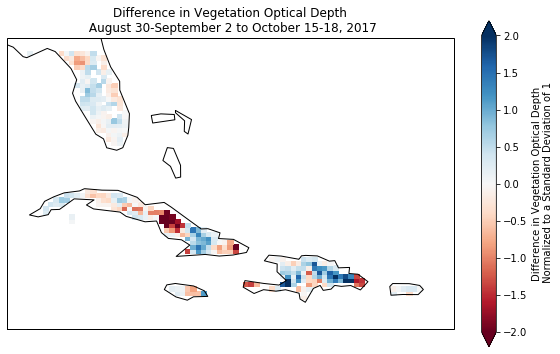

In [281]:
diff = (octsub.Optical_Thickness_Nad - sepsub.Optical_Thickness_Nad)

std1 = diff / np.std(diff)

fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
std1.plot(vmin = -2, vmax = 2, cmap = 'RdBu', cbar_kwargs={"label": "Difference in Vegetation Optical Depth\n Normalized to a Standard Deviation of 1"})
ax.set_title('Difference in Vegetation Optical Depth\n August 30-September 2 to October 15-18, 2017')

In [242]:
np.std(std1)

<xarray.DataArray 'Optical_Thickness_Nad' ()>
array(1.00000015)

### Load ERA5 dataset

1. Change longitude to a -180, 180 scale

2. Subset the data to the Caribbean and the time range

3. Calculate 10-meter wind speed  

In [243]:
ds = xr.open_dataset('20170901_20171031_ERA5_wind_daily.nc').sortby('latitude')
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 61)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time       (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-31T10:00:00
Data variables:
    u100       (time, latitude, longitude) float32 1.124378 ... -0.51964307
    v100       (time, latitude, longitude) float32 0.14495775 ... 0.115119494
    u10        (time, latitude, longitude) float32 0.79586196 ... -0.3886385
    v10        (time, latitude, longitude) float32 0.18632203 ... 0.008336663
    fg10       (time, latitude, longitude) float32 8.905949 ... 7.170212
    i10fg      (time, latitude, longitude) float32 8.781494 ... 7.1809444
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 14:53:07 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [244]:
ds['longitude'] = xr.where(ds['longitude'] > 180, ds['longitude'] - 360, ds['longitude'])

In [245]:
ds = ds.sel(latitude = slice(latmin, latmax), longitude = slice(lonmin, lonmax))
ds = ds.sel(time = slice('2017-09-01', '2017-10-18'))

In [246]:
def wind_speed(u, v):
    return np.sqrt(u**2 + v**2)

ds['ws10'] = wind_speed(ds.u10, ds.v10)
ds.ws10.attrs['units'] = 'm s**-1'
ds.ws10.attrs['long_name'] = '10 meter wind speed'

### Calculate the maximum wind speed between September 1 and October 18, 2017

1. Check the minimum wind speed (all values are positive)


2. Make an array of zeroes shaped like the wind speed DataArray.  This array will be populated by the maximum wind speeds.  Since all wind speeds are greater than zero, zero makes sense as the initial comparison value for the loop.


3. Get the maximum wind speed by looping through each time point.  The maximum wind speed for each pixel is stored in the array created in Step 2.  At each step of the loop, the maximum wind speed value for each pixel is updated by comparing between (1) the current time point and (2) the array of the maximum wind speed at each pixel for all previous time points.

In [247]:
np.min(ds.ws10) > 0

<xarray.DataArray 'ws10' ()>
array(True)

In [248]:
ds['ws10max'] = xr.zeros_like(ds.ws10.isel(time = 1))
ds.ws10max.attrs['units'] = 'm s**-1'
ds.ws10max.attrs['long_name'] = 'maximum 10 meter wind speed'

In [249]:
for date in range(1,len(ds.time)):
    ds['ws10max'] = np.fmax(ds.ws10max, ds.ws10.isel(time = date))

Text(0.5, 1.0, 'Maximum Daily 10-meter Wind Speed\n September 1 - October 18, 2017')

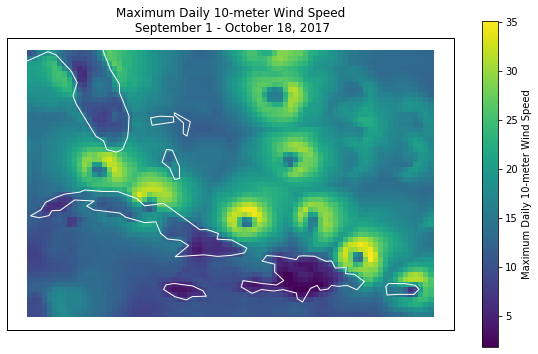

In [295]:
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(color = 'w')
ds.ws10max.plot(cbar_kwargs={'label': 'Maximum Daily 10-meter Wind Speed'})
ax.set_title('Maximum Daily 10-meter Wind Speed\n September 1 - October 18, 2017')

<font color=blue>**Incorporate hourly dataset**</font>

Text(0.5, 1.0, 'Maximum Hourly 10-meter Wind Speed\n September 1 - October 18, 2017')

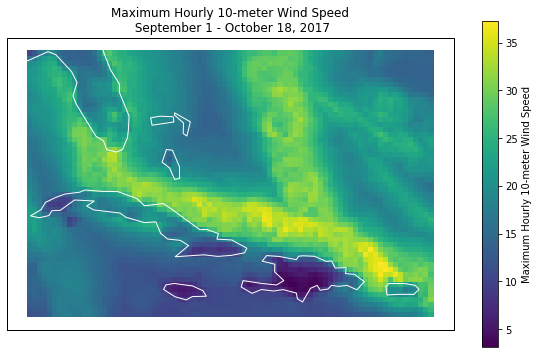

In [294]:
ds_hourly = xr.open_dataset('20170901_20171031_ERA5_wind_hourly_maxWS.nc').sortby('latitude').sel(latitude = slice(latmin, latmax), longitude = slice(lonmin, lonmax))
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(color = 'w')
ds_hourly.ws10max.plot(cbar_kwargs={'label': 'Maximum Hourly 10-meter Wind Speed'})
ax.set_title('Maximum Hourly 10-meter Wind Speed\n September 1 - October 18, 2017')

### Align the grids for the datasets.

1. Which projections are they currently in?

 - [ERA5](https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference) is in a geographic coordinate system on the GRIB1 sphere that has been converted to a lat/long grid when converted to NetCDF format.  No geographic coordinate system is specified in the documentation.  I will try WGS84 (EPSG:4326).
 - SMOS is in WGS 84 / NSIDC EASE-Grid 2.0 Global (EPSG 6933)


2. What is the spacing of the latitude and longitude coordinates?

 - SMOS is 0.20 degrees longitude, 0.259 latitude
 - ERA5 is 0.25 degrees


3. interp_like: Interpolate data from one dataset along the coordinates of another.  I interpolated SMOS to match the ERA5 grid.

In [252]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 53, longitude: 81, time: 48)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
  * time       (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-18T10:00:00
Data variables:
    u100       (time, latitude, longitude) float32 -5.6287336 ... 4.6306167
    v100       (time, latitude, longitude) float32 3.7703063 ... 1.6151701
    u10        (time, latitude, longitude) float32 -5.1501665 ... 4.318677
    v10        (time, latitude, longitude) float32 3.434556 ... 1.5067255
    fg10       (time, latitude, longitude) float32 9.620712 ... 8.971926
    i10fg      (time, latitude, longitude) float32 9.368036 9.204065 ... 8.01956
    ws10       (time, latitude, longitude) float32 6.1903462 ... 4.573969
    ws10max    (latitude, longitude) float32 9.711176 9.406879 ... 12.829986
Attributes:
    Conventions:  CF-1.6
    history:      2019-

In [253]:
pc = pc.rename({'lon': 'longitude',
                    'lat': 'latitude'})
diff = diff.rename({'lon': 'longitude',
                    'lat': 'latitude'})
std1 = std1.rename({'lon': 'longitude',
                    'lat': 'latitude'})

In [254]:
ds['VOD_diff'] = diff.interp_like(ds)
ds.VOD_diff.attrs['long_name'] = 'Difference in VOD between August 30 - September 2, 2017 and October 15-18, 2017'


ds['VOD_pc'] = pc.interp_like(ds)
ds.VOD_pc.attrs['long_name'] = 'Percent change in VOD between August 30 - September 2, 2017 and October 15-18, 2017'

ds['VOD_std1'] = std1.interp_like(ds)
ds.VOD_std1.attrs['long_name'] = 'Difference in VOD August 30 - September 2, 2017 and October 15-18, 2017 normalized to standard deviation = 1'
ds.VOD_std1

<xarray.DataArray 'VOD_std1' (latitude: 53, longitude: 81)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float64 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
Attributes:
    long_name:  Difference in VOD August 30 - September 2, 2017 and October 1...

**Compare the data before and after interpolation.**

Text(0.5, 1.0, 'After Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')

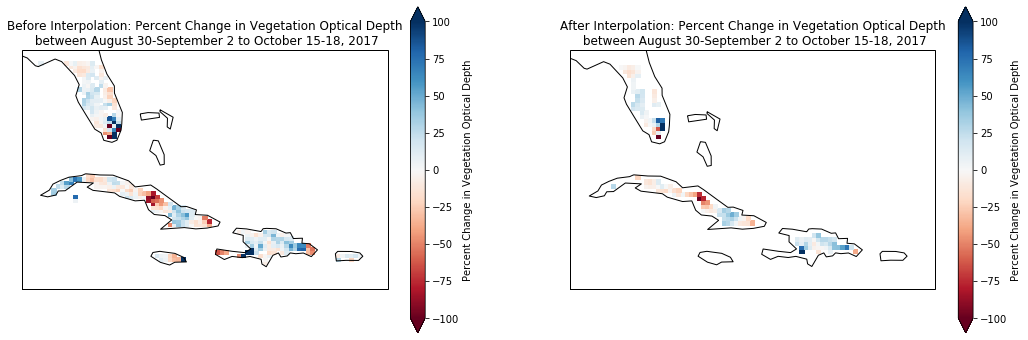

In [308]:
fig, axes = plt.subplots(figsize = (18, 6), ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].coastlines()
axes[1].coastlines()

pc.plot(ax = axes[0], vmin = -100, vmax = 100, cmap = 'RdBu', 
                cbar_kwargs={"label": "Percent Change in Vegetation Optical Depth"})
axes[0].set_title('Before Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


ds.VOD_pc.plot(ax = axes[1], vmin = -100, vmax = 100, cmap = 'RdBu',
              cbar_kwargs={'label': 'Percent Change in Vegetation Optical Depth'}) 
axes[1].set_title('After Interpolation: Percent Change in Vegetation Optical Depth\n between August 30-September 2 to October 15-18, 2017')


In [297]:
ds['ws10max_hourly'] = ds_hourly['ws10max']
ds.ws10max_hourly.attrs['units'] = 'm s**-1'
ds.ws10max_hourly.attrs['long_name'] = 'maximum hourly 10 meter wind speed'

In [298]:
ds

<xarray.Dataset>
Dimensions:         (latitude: 53, longitude: 81, time: 48)
Coordinates:
  * longitude       (longitude) float32 -85.0 -84.75 -84.5 ... -65.25 -65.0
  * latitude        (latitude) float32 17.0 17.25 17.5 17.75 ... 29.5 29.75 30.0
  * time            (time) datetime64[ns] 2017-09-01T10:00:00 ... 2017-10-18T10:00:00
Data variables:
    u100            (time, latitude, longitude) float32 -5.6287336 ... 4.6306167
    v100            (time, latitude, longitude) float32 3.7703063 ... 1.6151701
    u10             (time, latitude, longitude) float32 -5.1501665 ... 4.318677
    v10             (time, latitude, longitude) float32 3.434556 ... 1.5067255
    fg10            (time, latitude, longitude) float32 9.620712 ... 8.971926
    i10fg           (time, latitude, longitude) float32 9.368036 ... 8.01956
    ws10            (time, latitude, longitude) float32 6.1903462 ... 4.573969
    ws10max         (latitude, longitude) float32 9.711176 ... 12.829986
    VOD_diff        (lat

In [258]:
len(ds.ws10max) == len(ds.VOD_pc)

True

In [301]:
df = ds.ws10max.to_dataframe()
df = df.join(ds.ws10max_hourly.to_series())
df = df.join(ds.VOD_pc.to_series())
df = df.join(ds.VOD_diff.to_series())
df = df.join(ds.VOD_std1.to_series())
df = df[np.logical_not(np.isnan(df).any(axis=1))]
df.head()

ws10max  ws10max_hourly      VOD_pc  VOD_diff  VOD_std1
latitude longitude                                                           
18.50    -72.00      2.159603        3.137115  102.857681  0.086100  0.837186
         -71.00      2.533251        3.524468  -13.918825 -0.052327 -0.508793
         -70.25      3.302494        5.188635    6.977178  0.025104  0.244095
         -68.75     13.699134       15.176998  -38.182646 -0.129213 -1.256396
18.75    -72.00      2.130841        3.417211   76.592596  0.054885  0.533668

**Negative values indicate a loss of canopy cover after the storm.**

Text(0.5, 0, 'Maximum 10 meter wind speed (m/s)')

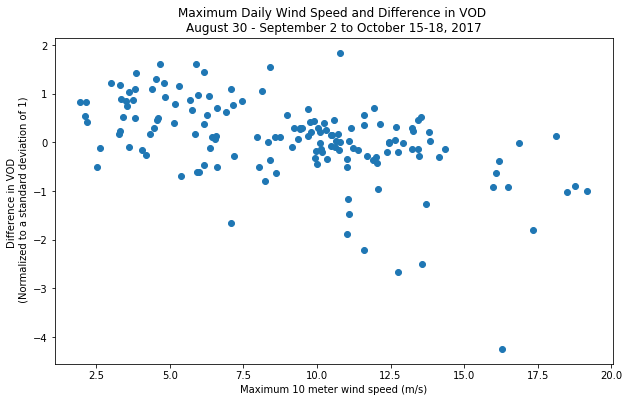

In [299]:
plt.figure(figsize = (10, 6))
plt.scatter(df.ws10max, df.VOD_std1)
plt.title('Maximum Daily Wind Speed and Difference in VOD \nAugust 30 - September 2 to October 15-18, 2017')
plt.ylabel('Difference in VOD \n (Normalized to a standard deviation of 1)')
plt.xlabel('Maximum Daily 10 meter wind speed (m/s)')


Text(0.5, 0, 'Maximum Hourly 10 meter wind speed (m/s)')

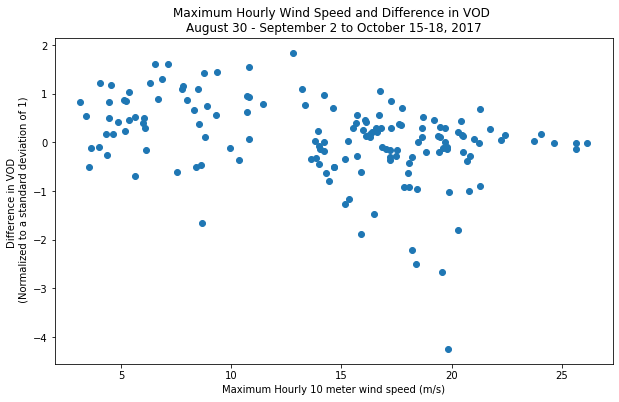

In [305]:
plt.figure(figsize = (10, 6))
plt.scatter(df.ws10max_hourly, df.VOD_std1)
plt.title('Maximum Hourly Wind Speed and Difference in VOD \nAugust 30 - September 2 to October 15-18, 2017')
plt.ylabel('Difference in VOD \n (Normalized to a standard deviation of 1)')
plt.xlabel('Maximum Hourly 10 meter wind speed (m/s)')

#### Compute Pearson correlation coefficient.  


In [261]:
np.corrcoef(df.ws10max, df.VOD_std1, rowvar = False)

array([[ 1.        , -0.51175221],
       [-0.51175221,  1.        ]])

In [303]:
np.corrcoef(df.ws10max_hourly, df.VOD_std1, rowvar = False)

array([[ 1.        , -0.36291824],
       [-0.36291824,  1.        ]])

### Future work:

Separate the data by plant community to see if there is a difference in response with different vegetation types.  

Look at other factors associated with storm events, such as precipitation.